# Using the HHL Linear Solver

This notebook illustrates how to use the VQLS integrated in the library via our `hhl-protoype`.
We first need to sdefine the linear system:

$$A \cdot x = b$$

We use here a randon sparse matrix $A$ and a random right hand side vector $b$

In [1]:
from scipy.sparse import random as sprand
import numpy as np

size = 3
A = sprand(size, size, density=0.8, format="csr")
A = np.random.rand(size, size)
A = A + A.T
b = np.random.rand(size)

## Classical Solution
We can of course obtain the solution of this linear system using `numpy` 

In [2]:
ref = np.linalg.solve(A, b)

## HHL Solution 

We can now instantiate the solver and solve the linear ssytem

In [3]:
from qiskit.primitives import Estimator, Sampler

estimator = Estimator()
sampler = Sampler()


In [5]:
from quantum_newton_raphson.hhl_solver import HHL_SOLVER

solver = HHL_SOLVER(estimator=estimator, sampler=sampler)
sol = solver(A, b)

## Visualize the solution
We can plot the evolution of the cost function using matplotlib

And also verify the accuracy of the solution obtaind via the VQLS solver

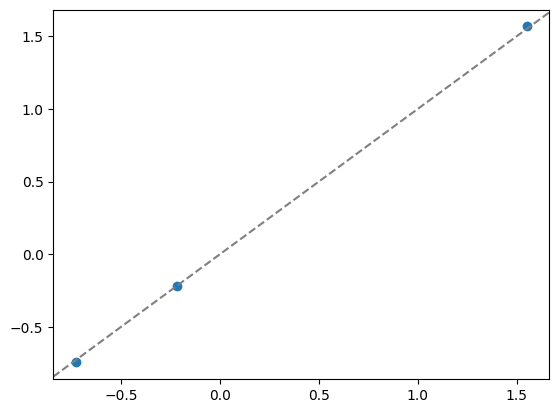

In [6]:
import matplotlib.pyplot as plt

plt.scatter(np.linalg.solve(A, b)[:3], sol.solution)
_ = plt.axline((0, 0), slope=1, linestyle="--", color="grey")